## Data Analysis and Prediction of Titanic Disaster

This is a training dataset, made to practice my 'skills' with the basic data science packages ( Pandas, Numpy, ScikitLearn, Matplot, etc... ). I am not a professional at Data Science and a don't even work in IT field, this is a hobbie, and i make this for fun... at least for now. Hope youe enjoy and comment!

Best Regards to you all!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import re
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = pd.merge_ordered(train, test)

## 1. Data Analysis

Starting by checking all variable types 

In [4]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Cheking how data is display

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 1.1 Total Survival Rate

Checking the amount of people which survived the Titanic disaster

0    549
1    342
Name: Survived, dtype: int64
0    62.0
1    38.0
Name: Survived, dtype: float64


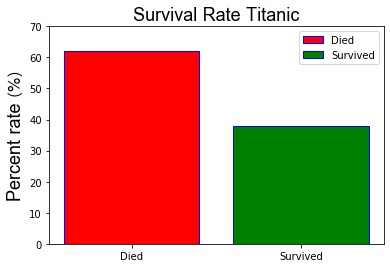

In [6]:
survived_matrix = round(train['Survived'].value_counts(normalize=True)*100)
print(train['Survived'].value_counts(normalize=False))
print(survived_matrix)

labels = survived_matrix
values = ["Died", "Survived"]

bars= plt.bar(values, labels, color = ['r', 'g'], edgecolor = "b")
plt.title('Survival Rate Titanic',fontdict= {'fontname': "Miriam",'fontsize': 20,'color': 'Black'})
plt.legend((bars[0], bars[1]), ('Died', 'Survived'))
plt.ylabel("Percent rate (%)", fontdict= {'fontname': "Miriam",'fontsize': 20,'color': 'Black'})
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])

plt.show()

### 1.2 Class Survival Rate 

Checking the amount of persons per class, 1st, 2nd and 3rd class, in percent.

In [7]:
round(df['Pclass'].value_counts(normalize=True, sort=False)*100)

1    25.0
2    21.0
3    54.0
Name: Pclass, dtype: float64

Checking how many persons from 1st, 2nd and 3rd class survived

In [8]:
#Creating subsets with each class in order to analyse separately
df_1st = df.loc[df['Pclass'] == 1]
df_2nd = df.loc[df['Pclass'] == 2]
df_3rd = df.loc[df['Pclass'] == 3]

# First class rate of survival
st = round(df_1st['Survived'].value_counts(normalize=True)*100, 1)
# Second class rate of survival
nd = round(df_2nd['Survived'].value_counts(normalize=True)*100, 1)
# Third class rate of survival
rd = round(df_3rd['Survived'].value_counts(normalize=True)*100, 1)

Creating a Dataframe and visualizing the different rates of survival for each class.

In [9]:
df_class_survival = {'Class    ':('1st Class', '2nd Class', '3rd Class'),
                     'Survived': (st[1], nd[1], rd[1]), 'Died': (st[0], nd[0], rd[0]) }

print(pd.DataFrame(df_class_survival))

   Class      Survived  Died
0  1st Class      63.0  37.0
1  2nd Class      47.3  52.7
2  3rd Class      24.2  75.8


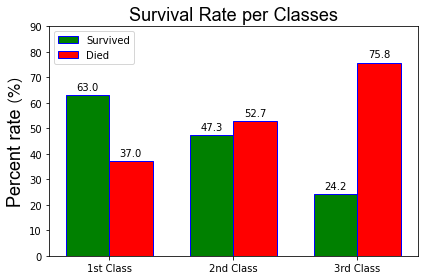

In [10]:
labels = ['1st Class', '2nd Class', '3rd Class']
survival_value = [st[1], nd[1], rd[1]]
died_value = [st[0], nd[0], rd[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survival_value, width, label='Survived',color = 'g', edgecolor = "b")
rects2 = ax.bar(x + width/2, died_value, width, label='Died', color = 'r', edgecolor = "b")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Percent rate (%)", fontdict= {'fontname': "Miriam",'fontsize': 20,'color': 'Black'})
ax.set_title('Survival Rate per Classes',fontdict= {'fontname': "Miriam",'fontsize': 20,'color': 'Black'})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

By this data is possible to check that people which travelled in first class had more chances of surviving 
than the others classes

### 1.3 Age Survival Rate

Checking the survival rate for young, considering less than 18 years, and elderly people, considering at least 65 years.

In [11]:
df_young = df.loc[df['Age'] < 18]
df_old = df.loc[df['Age'] >= 65]
df_adult = df.loc[(df['Age'] >= 18) & (df['Age'] < 65)]

In [12]:
young = round(df_young['Survived'].value_counts(normalize=True)*100, 1)
old = round(df_old['Survived'].value_counts(normalize=True)*100, 1)
adult = round(df_adult['Survived'].value_counts(normalize=True)*100, 1)

df_age_survival = {'Age    ':('Young (< 18)', 'Old  (>= 65)', 'Adult       '),
                     'Survived': (young[1], old[1], adult[1]), 'Died': (young[0], old[0], adult[0]) }

print(pd.DataFrame(df_age_survival))

        Age      Survived  Died
0  Young (< 18)      54.0  46.0
1  Old  (>= 65)       9.1  90.9
2  Adult             38.6  61.4


Checking the relation between youngsters and their class, in order to see if the class had influence even if they are under 18 years old.

In [13]:
df_young_1st = df.loc[(df['Age'] < 18) & (df['Pclass'] == 1)]
df_young_2nd = df.loc[(df['Age'] < 18) & (df['Pclass'] == 2)]
df_young_3rd = df.loc[(df['Age'] < 18) & (df['Pclass'] == 3)]

In [14]:
young_1st = round(df_young_1st['Survived'].value_counts(normalize=True)*100, 1)
young_2nd = round(df_young_2nd['Survived'].value_counts(normalize=True)*100, 1)
young_3rd = round(df_young_3rd['Survived'].value_counts(normalize=True)*100, 1)

df_young_survival = {'Youngster Class':('1st', '2nd', '3rd'),
                     'Survived': (young_1st[1], young_2nd[1], young_3rd[1]), 
                     'Died': (young_1st[0], young_2nd[0], young_3rd[0]) }

print(pd.DataFrame(df_young_survival))

  Youngster Class  Survived  Died
0             1st      91.7   8.3
1             2nd      91.3   8.7
2             3rd      37.2  62.8


By this information it is possible to check that even beeing young age the 3rd class was an key factor for the survival rate.

## 2. Replacing Missing Values

Treating the missing values of this dataset

There are missing values in 'Age', 'Fare', and 'Embarked' features. In Age Feature i am going to use the median value of each class to replace the values from that specific class. Example: Median of 1st class replacing NA Value in 'Pclass' == 1

Total number of missing values per feature ( The 418 NA of Survived Feature are the ones to be predicted )

In [15]:
df_check = df.fillna(np.nan)
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Total number of missing values using missingno library to help visualize

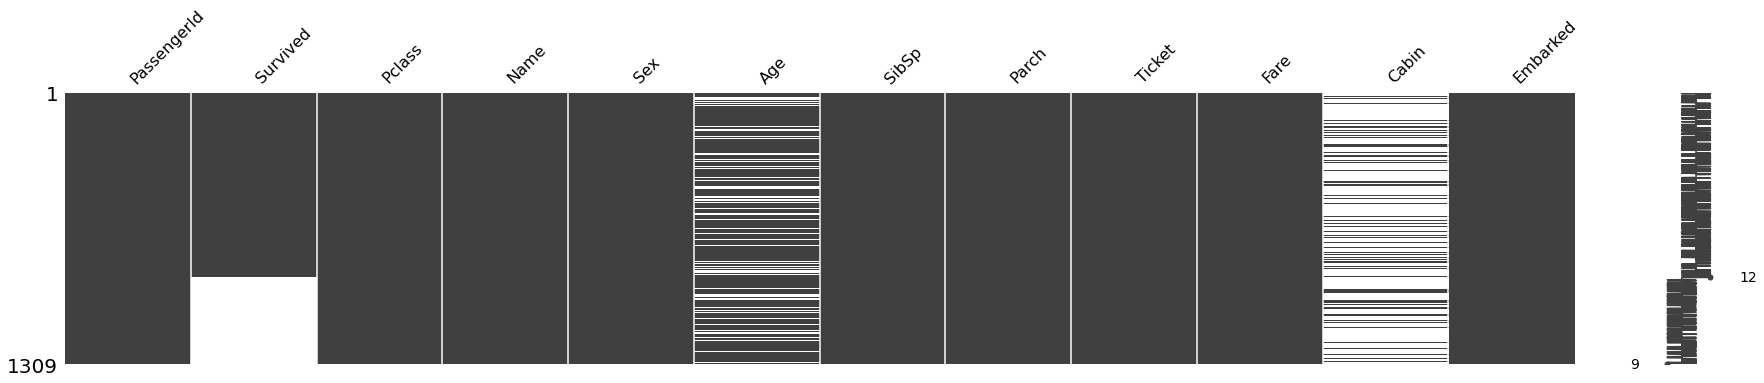

In [16]:
msno.matrix(df_check, figsize = (30,5))
plt.show()

### 2.1 Age Missing Values

Checking the distribution of the Age values through classes with histograms

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


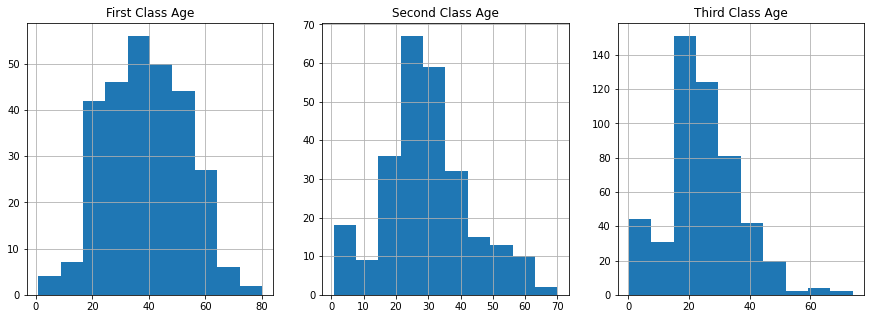

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.hist(df_1st['Age'])
ax1.set_title('First Class Age')
ax1.grid(True)

ax2.hist(df_2nd['Age'])
ax2.set_title('Second Class Age')
ax2.grid(True)

ax3.hist(df_3rd['Age'])
ax3.set_title('Third Class Age')
ax3.grid(True)

plt.show()

Cheking Skewness to compare with histograms, were is able to visualize that 1st class is well balanced although 2nd and 3rd classes have positive skewness.

In [18]:
print('First Class Age Skewness =', df_1st['Age'].skew(axis = 0,skipna=True))
print('Second Class Age Skewness =', df_2nd['Age'].skew(axis = 0,skipna=True))
print('Third Class Age Skewness =',df_3rd['Age'].skew(axis = 0,skipna=True))

First Class Age Skewness = 0.05431724773618809
Second Class Age Skewness = 0.26949839069253284
Third Class Age Skewness = 0.42448879510942644


I have chosen to use Median to replace missing age values due to the fact that there are some outliers in 2nd and 3rd classes, and some positive skewness.

In [19]:
median_1st = df_1st['Age'].median()
median_2nd = df_2nd['Age'].median()
median_3rd = df_3rd['Age'].median()

Counting number of NA Values in 'Age' column

In [20]:
df['Age'].isnull().sum()

263

Replacing NA values with median for each class, beeing careful to replace NA values only in 'Age' column.

In [21]:
df_class_NA = df[['Age', 'Pclass']] # subseting with the importante information to use the Median
df_1st_NA = df_class_NA.loc[df_class_NA['Pclass'] == 1].fillna(median_1st) # Replacing NA
df_2nd_NA = df_class_NA.loc[df_class_NA['Pclass'] == 2].fillna(median_2nd)
df_3rd_NA = df_class_NA.loc[df_class_NA['Pclass'] == 3].fillna(median_3rd)

df_NA = pd.concat([df_1st_NA, df_2nd_NA, df_3rd_NA]) # concatenating 
df_NA = df_NA.sort_index() # reordering by index

df = df.drop(['Age'], axis = 1) # removing old 'Age' column
df_NA = df_NA.drop(['Pclass'], axis = 1)
df = pd.concat([df, df_NA], axis=1, sort=False) # concatenating treated 'Age' column with the main dataframe

### 2.2 Fare Missing Values

Time to replace the 'Fare' missing values, starting to find the position of this value

In [22]:
df.loc[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
1043,1044,NaN,3,"Storey, Mr. Thomas",male,0,0,3701,NaN,NaN,S,60.5


Counting the different values of 'Fare' payed by passangers of 3rd class to embark Titanic.

In [23]:
df['Fare'].value_counts().unique().sum()

551

It is possible to check that there wasn't a preset fare, there are 551 different values for the tickets, so there is a need to go deeper in the analysis in order to find what will be the right value to replace the missing value. Through a box plot it is possible to check the distribution of the different fares payed. 

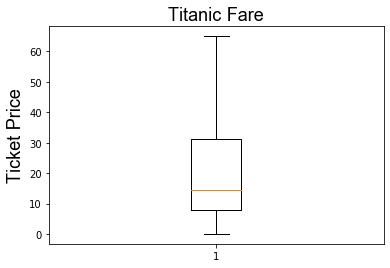

In [24]:
df_fare = df.dropna(subset=['Fare']) 

boxplt= plt.boxplot(x = df_fare['Fare'], showfliers=False)
plt.title('Titanic Fare',fontdict= {'fontname': "Miriam",'fontsize': 20,'color': 'Black'})
plt.ylabel("Ticket Price", fontdict= {'fontname': "Miriam",'fontsize': 20,'color': 'Black'})

plt.show()

There are many outliers, the prices vary too much. I will choose a median value between the 1st and 3rd quartile to have an average price for the ticket. The outliers probably were cause by last minute purchased tickets or discount.

I will chose a Median between the 1st and 3rd Quartile to avoid outliers.

In [25]:
df_fare['Fare'].quantile([0.25, 0.5, 0.75])

0.25     7.8958
0.50    14.4542
0.75    31.2750
Name: Fare, dtype: float64

In [26]:
median_fare = df['Fare'].loc[(df['Fare'] >= 7.89) & (df['Fare'] <= 31.25)].median()
df['Fare'] = df['Fare'].fillna(median_fare)

In [27]:
df['Fare'][1043]

13.78335

### 2.3 Embarked Missing Values

On the embarked feature there are 2 Nan value and there is a need to treat this feature to further machine learning model construction. As a categorical value the option is to remove the Nan values.

Position of Nan values

In [28]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
61,62,1.0,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,B28,NaN,38.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,B28,NaN,62.0


Removing the two rows with NA values of Embarked feature

In [30]:
df = df.drop([61,829])
df = df.reset_index()

## 3. Feature Engeneering

### 3.1 Name Feature

The name feature has some insights and it is possible to separate this feature to "Surname", "Name" and "Title".

In [32]:
title = []
name = []
surname = []
for values in df['Name']:
    title.append(re.sub("(.+, )|(\\..+)", "", values))
    surname.append(re.sub("(\\,.+)", "", values))
    name.append(re.sub("(.+, )|(.+.\. )|[[:punct:]]", "", values))

df['Title'] = title
df['Name'] = name
df['Surname'] = surname

In [33]:
df.head(2)

,index,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Title,Surname
0,0,1,0.0,3,Owen Harris,male,1,0,A/5 21171,7.2500,NaN,S,22.0,Mr,Braund
1,1,2,1.0,1,John Bradley (Florence Briggs Thayer),female,1,0,PC 17599,71.2833,C85,C,38.0,Mrs,Cumings


Checking the number of different titles which exists among the passengers of Titanic.

In [34]:
df.Title.value_counts()

Mr              757
Miss            259
Mrs             196
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Jonkheer          1
Mme               1
Lady              1
Don               1
Capt              1
Sir               1
the Countess      1
Dona              1
Name: Title, dtype: int64

There are 4 major titles present in this feature and several other with less representation, so i decided to join in one single title.

In [35]:
other_title = ['Capt','Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Sir', 'Rev', 'the Countess']

df['Title'] = df['Title'].replace('Mlle', 'Miss') 
df['Title'] = df['Title'].replace('Ms', 'Miss') 
df['Title'] = df['Title'].replace('Mme', 'Mrs') 
df['Title'] = df['Title'].replace(other_title, 'Other Title') 

In [36]:
df.Title.value_counts()

Mr             757
Miss           263
Mrs            197
Master          61
Other Title     29
Name: Title, dtype: int64

In [37]:
df.groupby(['Title', 'Sex']).size()

Title        Sex   
Master       male       61
Miss         female    263
Mr           male      757
Mrs          female    197
Other Title  female      4
             male       25
dtype: int64

### 3.2 Family Feature

Family Relation of Survival

Checking the amount of family members on Titanic to further check their relation on the survival rate.

In [38]:
df['SibSp'].value_counts()

0    889
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [39]:
df['Parch'].value_counts()

0    1000
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [40]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
df = df.drop(['SibSp', 'Parch' ], axis = 1) # removing columns

### 3.3 Cleaned Dataset

Reorganizing the columns on the dataset

In [41]:
cols = ['PassengerId', 'Pclass','Title', 'Name', 'Surname', 'Family', 
        'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']
df_clean = df[cols]

In [42]:
df_clean.head(2)

,PassengerId,Pclass,Title,Name,Surname,Family,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,Mr,Owen Harris,Braund,2,male,22.0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,Mrs,John Bradley (Florence Briggs Thayer),Cumings,2,female,38.0,PC 17599,71.2833,C85,C,1.0


## 4. Preparing for Machine Learning

To give the algorithm the right data for processing there is a need treat the data after ETL. Values should be normalized, padronized, and be as near as machine readable, so in this section i will prepare data so that machine learning Algorithms have easier and better results.


### 4.1 Removing Features

Removing feature that i considered not to have casuality to the fact of surviving or not to the titanic disaster

In [43]:
df_clean = df_clean.drop(['Name', 'Surname', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)
df_clean.head(2)

,Pclass,Title,Family,Sex,Age,Fare,Embarked,Survived
0,3,Mr,2,male,22.0,7.2500,S,0.0
1,1,Mrs,2,female,38.0,71.2833,C,1.0


### 4.2 Strings to Numbers

As said before, computers read eletric pulses, they read inputs an outputs, they read numbers, so algorithms generally work way better when feed them with numbers. Following this, i am reorganizing the information on the dataset without loosing the information contain in each row.

In [44]:
# Title Feature
df_clean['Title'] = df_clean['Title'].replace('Mrs', 0) 
df_clean['Title'] = df_clean['Title'].replace('Miss', 0.2) 
df_clean['Title'] = df_clean['Title'].replace('Master', 0.4) 
df_clean['Title'] = df_clean['Title'].replace('Mr', 0.6)
df_clean['Title'] = df_clean['Title'].replace('Other Title', 0.8) 

# Sex Feature
df_clean['Sex'] = df_clean['Sex'].replace('male', 0)
df_clean['Sex'] = df_clean['Sex'].replace('female', 1)

# Embarked Feature
df_clean['Embarked'] = df_clean['Embarked'].replace('C', 0)
df_clean['Embarked'] = df_clean['Embarked'].replace('Q', 0.5)
df_clean['Embarked'] = df_clean['Embarked'].replace('S', 1)

### 4.3 Normalize 

Now that all information is numeric there is a need to put it in the same scale because 'Age' and 'Fare' have values too different from other features. Some algorithms don't need this procedure, although if you want to test different algorithms i recomend this step

In [45]:
df_X = df_clean.drop(['Survived'], axis = 1)
df_Y = df_clean['Survived']

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_X), columns = df_X.columns)

df_norm_final = pd.concat([df_norm, df_Y], axis=1, sort=False)
df_norm_final.head(2)

,Pclass,Title,Family,Sex,Age,Fare,Embarked,Survived
0,1.0,0.75,0.1,0.0,0.273456,0.014151,1.0,0.0
1,0.0,0.00,0.1,1.0,0.473882,0.139136,0.0,1.0


In [46]:
df_clean.tail()

,Pclass,Title,Family,Sex,Age,Fare,Embarked,Survived
1302,3,0.6,1,0,24.0,8.0500,1.0,NaN
1303,1,0.8,1,1,39.0,108.9000,0.0,NaN
1304,3,0.6,1,0,38.5,7.2500,1.0,NaN
1305,3,0.6,1,0,24.0,8.0500,1.0,NaN
1306,3,0.4,3,0,24.0,22.3583,0.0,NaN


### 4.4 Spliting test and train data

In [54]:
train_final = df_norm_final.iloc[0:891,]
test_final = df_norm_final.iloc[891:1307,]

### 4.5 Correlation and importance between features

In [ ]:
correlation <- cor(train_final, method = c('pearson'))
corrplot(correlation, method = c('number'), type = c('lower'))

train_final$Survived <- as.factor(train_final$Survived)

train_final_imp <- randomForest(Survived ~ Pclass + Title + Family + Sex + Age + Fare, train_final, 
                                ntree=1000, importance=TRUE, na.action=na.fail)

importance(train_final_imp)
varImpPlot(train_final_imp, sort=TRUE)